In [1]:
#Python Notebook illustrating Clustering 
#importing the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset = pd.read_csv("RetailData.csv")

# Column Qty and Rate used for purpose of clustering

X = dataset.iloc[:, [7,11]].values


In [3]:
print("dataset size: [",dataset.shape[0],'rows,',
      dataset.shape[1],'columns]')
dataset.head()


dataset size: [ 1238 rows, 14 columns]


,Order Id,Order Date,Month,Customer,Invoice Id,Product Id,Product Name,Qty,Rate,Net Amount,Tax Type,TAX,Tax Amount,Amount
0,10067,42406,Feb,Customer 1,10075,10023,RICE STICKS 5MM 1PKT,30.0,159.5,4785.0,VAT,14.5,693.83,4785.0
1,10177,42443,Mar,Customer 1,10145,ITEM-CM_BLACKPEPPER,BLACK PEPPER QUALITY2 1KG,1.0,810.0,810.0,VAT,5.5,44.55,810.0
2,10177,42443,Mar,Customer 1,10145,10466,BASMATI RICE QUALITY1 25KG,1.0,2050.0,2050.0,,0.0,0.00,2050.0
3,10052,42401,Feb,Customer 1,10060,10534,WALNUT QUALITY2 1KG,1.0,1317.0,1317.0,VAT,14.5,190.97,1317.0
4,10052,42401,Feb,Customer 1,10060,ITEM-BADAM,ALMOND 1KG,2.0,922.0,1844.0,VAT,14.5,267.38,1844.0


# Lets Analyse for two clusters

In [4]:
from sklearn.cluster import KMeans  

# Applying K-means to the data set for two clusters
kmeans = KMeans(n_clusters = 2 ,  
                random_state = 42)

y_kmeans = kmeans.fit_predict(X)

# fit_predict() method returns which data points 
    # belong to which cluster

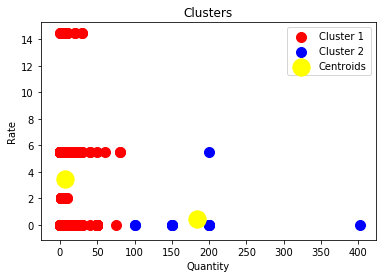

In [5]:
# Visualization of two clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Quantity')
plt.ylabel('Rate')
plt.legend()
plt.show()

In [6]:
print("Interia is", kmeans.inertia_)

Interia is 184747.01492387167


# Now let us plot the elbow method to get an intuition for what number of cluster would be the best fit for our data

In [7]:
# Applying K-means algorithm to the data with the right
# number of clusters obtained from Elbow method
  
# Finding out optimum number of clusters by
# "Within Cluster Sum of Squares" (WCSS)
wcss = []    
for i in range (1,7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    random_state = 0)
    kmeans.fit(X)   
    
    # Compute WCSS and append it to the list Inertia 
    wcss.append(kmeans.inertia_) 

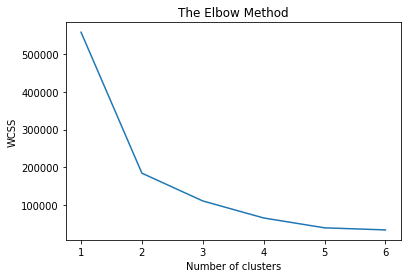

In [8]:

plt.plot(range(1, 7), wcss)        # plotting Elbow method
plt.title('The Elbow Method')       # naming the title
plt.xlabel('Number of clusters')    # labeling x axis   
plt.ylabel('WCSS')                  # labelling the y axis          
plt.show()                          #Display the chart

In [9]:
print("Best k here based on elbow curve for inertia is", 3)

Best k here based on elbow curve for inertia is 3
